In [1]:
import pandas as pd

df = pd.read_csv("Medical_Insurance_dataset.csv")

In [2]:
df.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [3]:
df.loc[df['sex']=='male','sex']=1
df.loc[df['sex']=='female','sex']=0
df['sex'] = df['sex'].astype('int')

df.loc[df['smoker']=='yes','smoker']=1
df.loc[df['smoker']=='no','smoker']=0
df['smoker'] = df['smoker'].astype('int')

In [4]:
df = pd.get_dummies(df)

In [5]:
features = df[df.keys().drop('charges')]
target = df['charges'].values.reshape(-1,1)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42)

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
from lightgbm import LGBMRegressor

clf = LGBMRegressor()
clf.fit(X_train_scaled, y_train)

/home/minsuchae/.pyenv/versions/3.9.0/envs/tensorflow_gpu_2.7.0/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMRegressor()

In [9]:
pred = clf.predict(X_test_scaled)

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

print("MAE :",mean_absolute_error(y_test,pred))
print("RMSE :",np.sqrt(mean_squared_error(y_test,pred)))

MAE : 1854.8172144646308
RMSE : 3634.8404930984266


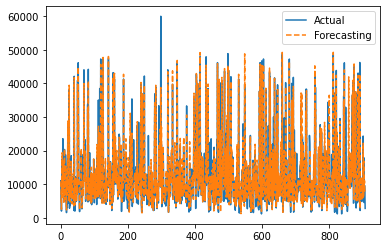

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(y_test, linestyle='-',label='Actual')
plt.plot(pred, linestyle='--', label='Forecasting')
plt.legend()
plt.show()